## Car Price Predictions

### Importing necessary libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
import statsmodels.formula.api as smf
import statsmodels.api as sapi

### Importing data through Pandas library

In [55]:
data=pd.read_csv('Cars.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### About data

In [56]:
data.isnull().sum() # to check whether null value is present in data or not 

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [57]:
data.dtypes # to check dataypes of every feature or column of data

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [58]:
data['Registration'].map({'yes':1,'no':0}) # to map 1 for registered car and 0 for not registered car

0       1
1       1
2       1
3       1
4       1
       ..
4340    1
4341    1
4342    1
4343    1
4344    1
Name: Registration, Length: 4345, dtype: int64

In [59]:
data.describe(include='all') # to describe data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [60]:
data=data.drop(['Model'],axis=1) # To drop column 'Model' from data

In [61]:
data_no_mv=data.dropna(axis=0) # to remove rows having null values from data and assign it to datafram data_no_mv

In [62]:
data_no_mv.isnull().sum() # to check whether any null value is remaining or not 

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [63]:
data_no_mv.describe(include='all') # to describe data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Text(0.5, 1.0, 'Distribution plot of price')

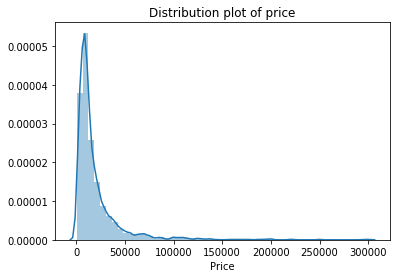

In [64]:
sns.distplot(data_no_mv.Price) # to check distribution plot of price
plt.title("Distribution plot of price")

Text(0.5, 1.0, 'Boxplot for price')

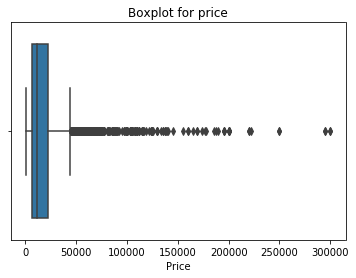

In [65]:
sns.boxplot(data_no_mv.Price) # to check boxplot for price
plt.title("Boxplot for price")

### Removing outliers and Data Cleaning

In [66]:
q=data_no_mv['Price'].quantile(0.99) # getting value of 99 percentile
data1=data_no_mv[data_no_mv['Price']<q] # to get values of price below 99 percentile and assigning it to new dataframe
data1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


Text(0.5, 1.0, 'Distribtion plot for price')

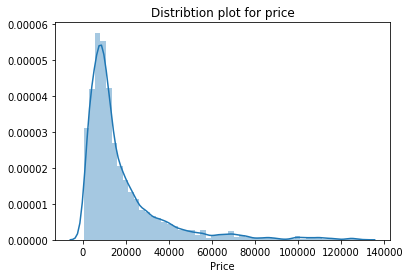

In [67]:
sns.distplot(data1['Price']) # Again checking distribution plot of price
plt.title("Distribtion plot for price")

Text(0.5, 1.0, 'Distribution plot for mileage')

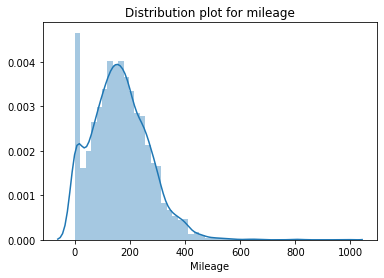

In [68]:
sns.distplot(data_no_mv.Mileage) # To check distribution plot of mileage
plt.title("Distribution plot for mileage")

In [69]:
q=data_no_mv['Mileage'].quantile(0.99) # getting value of 99 percentile
data2=data1[data1['Mileage']<q] # to get values of mileage below 99 percentile and assigning it to new dataframe
data2


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


Text(0.5, 1.0, 'Distribution plot of mileage')

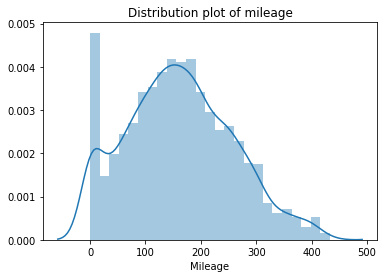

In [70]:
sns.distplot(data2['Mileage']) # again checking the distribution plot of mileage
plt.title("Distribution plot of mileage")

Text(0.5, 1.0, 'Distribution plot of EngineV')

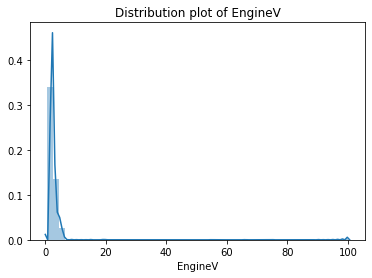

In [71]:
sns.distplot(data_no_mv['EngineV']) # to check distribution plot of engine volume
plt.title("Distribution plot of EngineV")

In [72]:
data3=data2[data2['EngineV']<6.5] # to get values of engine volume below 6.5 and assigning it to new dataframe

Text(0.5, 1.0, 'Distribution plot of EngineV')

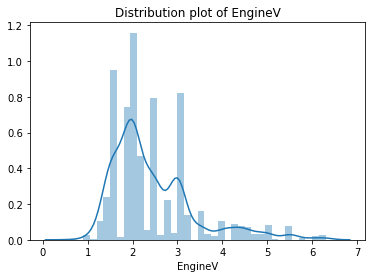

In [73]:
sns.distplot(data3['EngineV']) # again checking the distribution plot of engine volume
plt.title("Distribution plot of EngineV")

Text(0.5, 1.0, 'Distribution plot of year')

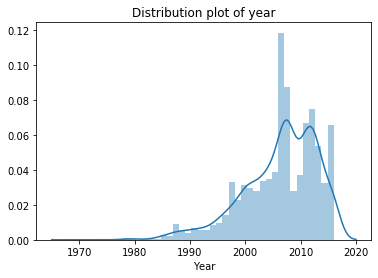

In [74]:
sns.distplot(data_no_mv['Year']) # to check distribution plot of year
plt.title("Distribution plot of year")

In [75]:
q=data_no_mv['Year'].quantile(0.01)# getting value of 1 percentile
data4=data3[data3['Year']>q]# to get values of mileage below 99 percentile and assigning it to new dataframe

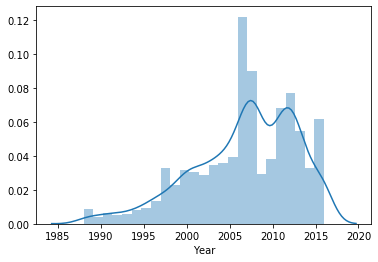

In [76]:
sns.distplot(data4['Year']) # again checking the distribution plot of year

In [77]:
data_cleaned=data4.reset_index(drop=True) # reset index of former data and assign it to new dataframe 

In [78]:
data_cleaned.describe(include='all') # describing the new dataframe

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Text(0.5, 1.0, 'Price and Mileage')

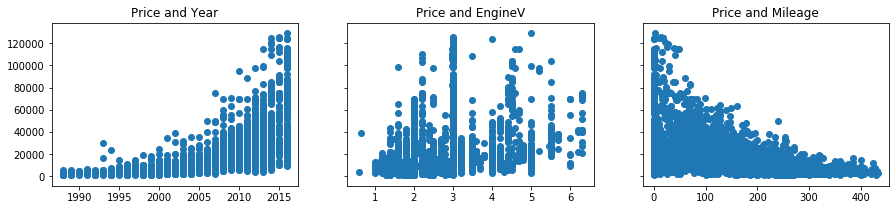

In [79]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3)) # to creating subplots
ax1.scatter(data_cleaned['Year'],data_cleaned['Price']) # to scatter year and price
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price']) # to scatter engine volume and price
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price']) # to scatter mileage and price
ax3.set_title('Price and Mileage')

In [80]:
data_cleaned['log_price']=np.log(data_cleaned['Price']) # taking logarithm of price to remove non-linearity of above features 

Text(0.5, 1.0, 'Log_Price and Mileage')

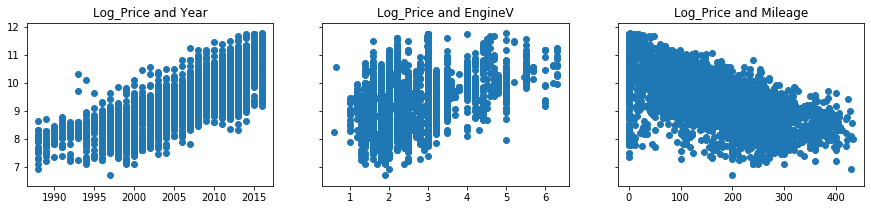

In [81]:
# again checking the non-linearity of data features

fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log_Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log_Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log_Price and Mileage')

In [82]:
data_cleaned=data_cleaned.drop(['Price'],axis=1) # now removing the price column from dataset

In [83]:
data_cleaned.columns.values # to see columns of cleaned data

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

### To check multicollinearity

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # importing vif to check multicollinearity of data
variables=data_cleaned[['Year','EngineV','Mileage']] # features of which multicollinearity is to be checked
vif=pd.DataFrame() # creating a dataframe
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif


,VIF,Features
0,10.360888,Year
1,7.660317,EngineV
2,3.794319,Mileage


In [85]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1) # as year is much correlated to other features so removing it..

In [86]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True) # to form dummy data

In [87]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [88]:
# now checking multicollinearity of remaining features

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_with_dummies[['EngineV','Mileage']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,2.804998,EngineV
1,2.804998,Mileage


In [89]:
data_with_dummies.columns # to check columns of dummy data

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [90]:
cols=['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

### Data Preprocessing

In [91]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [92]:
targets=data_preprocessed['log_price'] # to form targets
inputs=data_preprocessed.drop(['log_price'],axis=1) # to form inputs

In [93]:
from sklearn.preprocessing import StandardScaler # importing standard scaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
input_scaled=scaler.fit_transform(inputs) # standard scaling of input data

In [95]:
train_x,test_x,train_y,test_y=train_test_split(input_scaled,targets,test_size=0.2,random_state=365)
# data splitting into training and testing data 

### Linear Regression

In [96]:
model=LinearRegression() # building a model of linear regression
model.fit(train_x,train_y) # fitting training data into model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
y_pred=model.predict(test_x) # predicting test_data

Text(0, 0.5, 'Predicted Price')

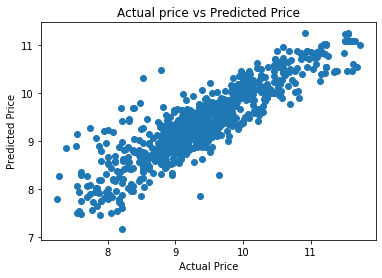

In [98]:
plt.scatter(test_y,y_pred) # to scatter actual price and predicted price
plt.title("Actual price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0.5, 1.0, 'Residual PDF')

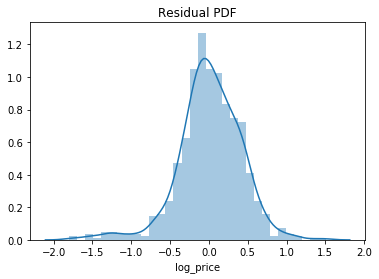

In [99]:
sns.distplot(test_y-y_pred) # to check ditribution plot of residuals
plt.title("Residual PDF")

In [100]:
model.score(train_x,train_y) # to check accuracy of model

0.7415645182486199

In [101]:
df_pf=pd.DataFrame(np.exp(y_pred),columns=['Predictions']) # to get predicted price by taking exponential of predicted value..
df_pf.head()

,Predictions
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [102]:
test_y=test_y.reset_index(drop=True) # to reset index

In [103]:
df_pf['Actual_Price']=np.exp(test_y) # to get actual price by taking exponential of test_data
df_pf

,Predictions,Actual_Price
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


In [104]:
df_pf['Residual']=df_pf['Actual_Price']-df_pf['Predictions'] # to get residuals 

In [105]:
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Actual_Price']*100) # to get percentage difference b/w actual price and predictions
df_pf

,Predictions,Actual_Price,Residual,Difference%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369
...,...,...,...,...
769,14874.949923,29500.0,14625.050077,49.576441
770,5735.556226,5300.0,-435.556226,8.218042
771,13623.775492,18300.0,4676.224508,25.553139
772,28096.133846,68500.0,40403.866154,58.983746


In [106]:
df_pf.sort_values(by='Difference%',ignore_index=True) # to sort values by percentage difference b/w actual price and predictions

,Predictions,Actual_Price,Residual,Difference%
0,11493.468837,11500.0,6.531163,0.056793
1,16985.248181,16999.0,13.751819,0.080898
2,12486.363039,12500.0,13.636961,0.109096
3,23257.548035,23200.0,-57.548035,0.248052
4,8876.915349,8900.0,23.084651,0.259378
...,...,...,...,...
769,16110.597145,3600.0,-12510.597145,347.516587
770,10650.438709,2300.0,-8350.438709,363.062553
771,9371.936025,1900.0,-7471.936025,393.259791
772,35671.365746,6500.0,-29171.365746,448.790242
